In [ ]:
#1. a. The plot which best represents a merry-go-round is plot A.
#      The plot which best represents the planets in our solar system is C.

#the power law form for the velocity as a function of the radius for the plots:

#A 
V = R
#B
V = 
#C
V = R**(-1/2)
#D
V = R**2


In [ ]:
#1 b. As distance increases speed does as well, linearly (just like a rigid body). 
#     At the edge of the central bulge the speed levels off until it remains constant.
#     This rotation curve says to me that most of the mass in the galaxy is farther out.

In [ ]:
#1. c. No, it is not consitent. The decription given before is based on the graph of the rotational speed and is better. 
#      Non luminous matter can be used to explain the difference in the two graphs. 
#      Dark matter is wheat causes the rotation curve to have a strange shape.

In [ ]:
#2. The density depends on the radius for the equation dm/dr = 4*(np.pi)*(r**2)*p
#   As 1/(np.sqrt(r))

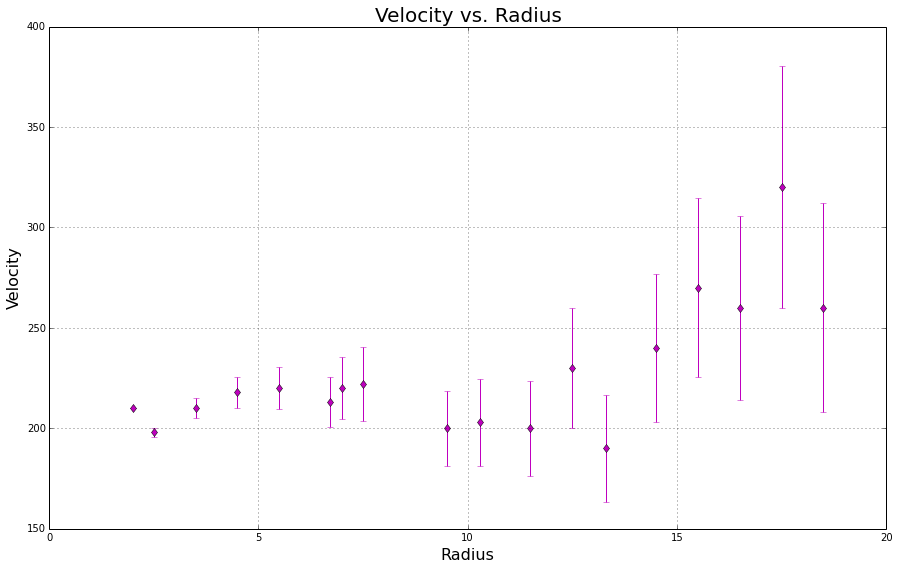

In [1]:
#2. a.
import numpy as np
import math
import matplotlib.pyplot as plt

data_radius = (2, 2.5, 3.5, 4.5, 5.5, 6.7, 7, 7.5, 9.5, 10.3, 11.5, 12.5, 13.3, 14.5, 15.5, 16.5, 17.5, 18.5)
data_velocity = (210, 198, 210, 218, 220, 213, 220, 222, 200, 203, 200, 230, 190, 240, 270, 260, 320, 260)

err_steps = np.linspace(0,  0.2, 18)

err = err_steps*data_velocity
                    
plt.figure(figsize=(15,9))
plt.errorbar(data_radius, data_velocity, yerr= err, marker='d', linestyle='None', color='m')
plt.grid(True)
plt.xlabel('Radius',fontsize=16)
plt.ylabel('Velocity', fontsize=16)
plt.title('Velocity vs. Radius',fontsize=20)

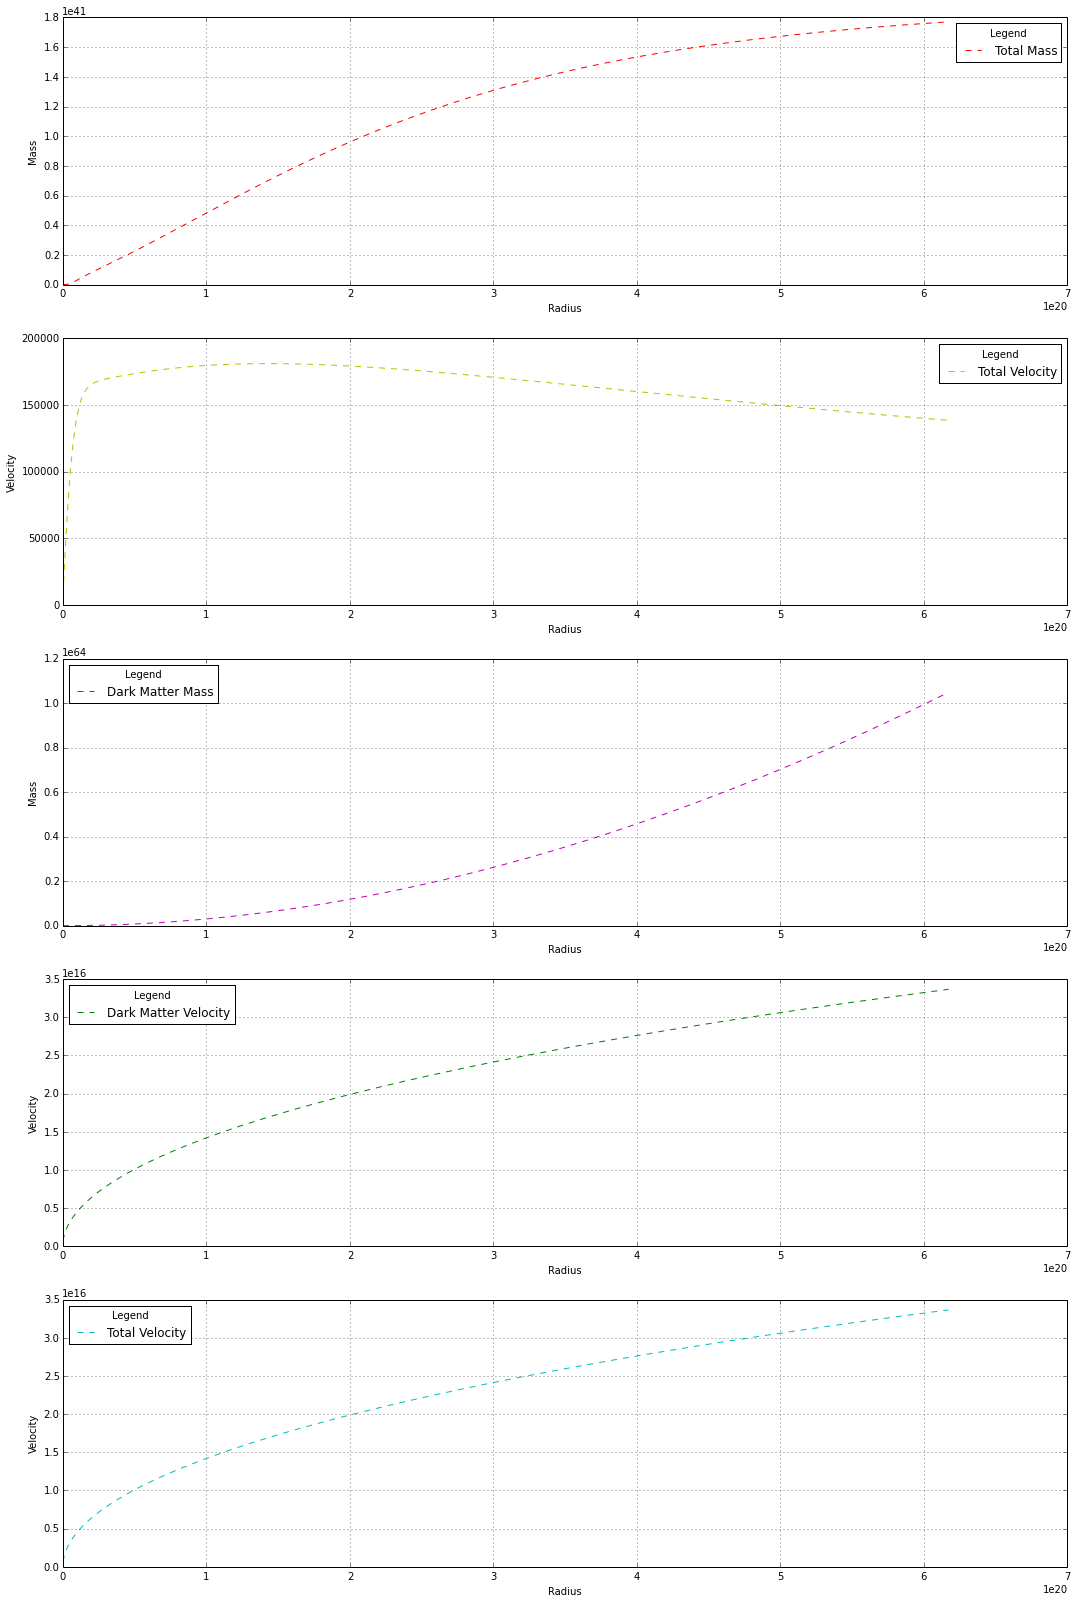

In [21]:
#2. b.

import numpy as np
import math as m
from astropy import units as u
from astropy import constants as const
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

Ms=1.989e30
M1= (1.3e10)*Ms                                                      
a1=0.4*3.086e19
M2=1e9
a2=0.5
M3=(6.5e10)*Ms
a3=4.0*3.086e19
p_crit= 2.3     
Sc=0.3
rs=230*3.086e19


def dmdr_bulge(r):  
    rho1=(M1/(4*np.pi*pow(a1,3.0)))*((1+ (r/a1)**2.0)**(-5/2))
    dmdr_b=4*np.pi*(pow(r,2))*rho1
    return dmdr_b
def dmdr_halo(r):
    rho2= (M2*((a2 + (r/3.086E19)))**(-3.1))*(Ms/((3.086E19)**3))
    dmdr_h=4*np.pi*pow(r,2)*rho2
    return dmdr_h
def dmdr_disk(r):
    rho3= (M3/(2*np.pi*np.power(a3,2.0))) * (np.exp(-(r)/a3))
    dmdr_d= (2*np.pi*r)*rho3
    return dmdr_d
def dmdr_DarkMatter(r):  
    rho4=(p_crit*Sc)/((r/rs)*(1+(r/rs))**2)
    dmdr_DM=4*np.pi*pow(r,2)*rho4
    return dmdr_DM
def velocity(L, r):                                                 
    v=np.sqrt((6.67E-11)*L/r)
    return v

start = 0.1                                                         
end = 20.0*3.086E19
samples = 5000
dr = end/samples
r=np.linspace(start, end, samples)                                  

m_bulge=[dr*dmdr_bulge(r[x]) for x in range(samples)]                
m_halo=[dr*dmdr_halo(r[x]) for x in range(samples)]
m_disk=[(dr*dmdr_disk(r[x])) for x in range(samples)]
m_tot=[dr*(dmdr_halo(r[x])+dmdr_bulge(r[x])+dmdr_disk(r[x])) for x in range(samples)]
DM=[(dr*dmdr_DarkMatter(r[x])) for x in range(samples)]
total_mass=[dr*(dmdr_halo(r[x])+dmdr_bulge(r[x])+dmdr_disk(r[x]) + dmdr_DarkMatter(r[x])) for x in range(samples)]

for i in range(samples):                                            
    if i == 0:
        m_bulge[i] = m_bulge[i]
    else:
        m_bulge[i] += m_bulge[(i-1)]
for i in range(samples):
    if i == 0:
        m_halo[i] = m_halo[i]
    else:
        m_halo[i] += m_halo[(i-1)]        
for i in range(samples):                                           
    if i == 0:
        m_disk[i] = m_disk[i]
    else:
        m_disk[i] += m_disk[(i-1)]                
for i in range(samples):
    if i == 0:
        m_tot[i] = m_tot[i]
    else:
        m_tot[i] += m_tot[(i-1)]        
for i in range(samples):                                            
    if i == 0:
        DM[i] = DM[i]
    else:
        DM[i] += DM[(i-1)]                      
for i in range(samples):                                              
    if i == 0:
        total_mass[i] = total_mass[i]
    else:
        total_mass[i] += total_mass[(i-1)]
        
v_tot=[velocity(m_tot[x],r[x]) for x in range(samples)]               
DM_velocity=[velocity(DM[x], r[x]) for x in range(samples)]         
total_velocity=[velocity(total_mass[x], r[x]) for x in range(samples)] 

fig= plt.figure(1, figsize=(18,45))

ax1 = fig.add_subplot(811)  
ax1.plot(r, m_tot, 'r', label='Total Mass', linestyle='--')
ax1.set_xlabel('Radius')
ax1.set_ylabel('Mass')
ax1.grid(True)
ax1.legend(title='Legend', fontsize=12, loc=0)

ax1 = fig.add_subplot(812)  
ax1.plot(r, v_tot, 'y', label='Total Velocity', linestyle='--')
ax1.set_xlabel('Radius')
ax1.set_ylabel('Velocity')
ax1.grid(True)
ax1.legend(title='Legend', fontsize=12, loc=0)

ax1 = fig.add_subplot(813)          
ax1.plot(r, DM, 'm', label='Dark Matter Mass', linestyle='--')
ax1.set_xlabel('Radius')
ax1.set_ylabel('Mass')
ax1.grid(True)
ax1.legend(title='Legend', fontsize=12, loc=0)

ax1 = fig.add_subplot(814)          
ax1.plot(r, DM_velocity, 'g', label='Dark Matter Velocity', linestyle='--')
ax1.set_xlabel('Radius')
ax1.set_ylabel('Velocity')
ax1.grid(True)
ax1.legend(title='Legend', fontsize=12, loc=0)

ax1 = fig.add_subplot(815)      
ax1.plot(r, total_velocity, 'c', label='Total Velocity', linestyle='--')
ax1.set_xlabel('Radius')
ax1.set_ylabel('Velocity')
ax1.grid(True)
ax1.legend(title='Legend', fontsize=12, loc=0)

In [2]:
#2. c. It does not match, we need to add dark matter.